IMPORTING IMPORTANT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FUNCTION DEFINITIONS

In [ ]:
def sigmoid(z):
  return (1/(1 + np.exp(-z)))

In [ ]:
def cost_function_L2(X,y,w,lam):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -1 / len(y) * np.sum(y*np.log(hypothesis)+(1-y)*np.log(1-hypothesis)) + lam*np.sum(w**2)/2
  return J

In [ ]:
def cost_function_L1(X,y,w,lam):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -1 / len(y) * np.sum(y*np.log(hypothesis)+(1-y)*np.log(1-hypothesis)) + lam*np.abs(np.sum(w))/2
  return J

In [ ]:
def batch_gradient_descent_L2(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = (1-alpha*lam)*w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function_L2(X,y,w,lam)
  return w,cost_history

In [ ]:
def batch_gradient_descent_L1(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    w = (1-(np.sign(np.sum(w)))*alpha*lam/2)*w - (alpha/len(y)) * np.dot(hypothesis - y,X)
    cost_history[i] = cost_function_L1(X,y,w,lam)
  return w,cost_history

In [ ]:
def mini_batch_gradient_descent_L2(X,y,w,alpha,iters,batch_size,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w = (1-alpha*lam)*w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def mini_batch_gradient_descent_L1(X,y,w,alpha,iters,batch_size,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + batch_size]
    ind_y = y[rand_index:rand_index + batch_size]
    w =  (1-np.sign(np.sum(w))*alpha*lam/2)*w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L1(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def stochastic_gradient_descent_L2(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w = (1-alpha*lam)*w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L2(ind_x,ind_y,w,lam)
  return w,cost_history

In [ ]:
def stochastic_gradient_descent_L1(X,y,w,alpha,iters,lam):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y))
    ind_x = X[rand_index:rand_index + 1]
    ind_y = y[rand_index:rand_index + 1]
    w =  (1-np.sign(np.sum(w))*alpha*lam/2)*w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function_L1(ind_x,ind_y,w,lam)
  return w,cost_history

EVALUATION METRICS

In [ ]:
def mean_squared_error(y_hat,y):
  error = (1/len(y)) * np.sum((y_hat - y)**2)
  return error

In [ ]:
def mean_absolute_error(y_hat,y):
  error = (1/len(y)) * np.sum(abs(y_hat - y))
  return error

In [ ]:
def correlation_coefficient(y_hat,y):
  coef = np.sum((y_hat - y_hat.mean())*(y - y.mean()))/(np.sqrt(np.sum((y_hat-y_hat.mean())**2))*np.sqrt(np.sum((y-y.mean())**2)))
  return coef

In [ ]:
def specs(X_test,y_test,w):  
  TN, FN, TP, FP = 0, 0, 0, 0

  y_pred = np.dot(X_test, w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0

  TP = np.sum(y_pred * y_test)
  FP = np.sum(y_pred * (1-y_test))
  FN = np.sum((1-y_pred) * y_test)
  TN = np.sum((1-y_pred) * (1-y_test))

  sensitivity = TP/(TP + FN + 10**(-12))
  specificity = TN/(TN + FP + 10**(-12))
  accuracy = (TP + TN)/(TP + TN + FP + FN)*100

  return sensitivity, specificity, accuracy

DATA PRE-PROCESSING

In [ ]:
from random import Random
dataset=pd.read_csv("/content/gdrive/MyDrive/NNFL_ASSIGNMENT_1/data_q6_q7.txt",names=["a", "b", "c", "d", "e", "f", "g", "output"],delimiter="\t",error_bad_lines=False)
Random(10).shuffle(dataset.values)
dataset.reindex(np.random.permutation(dataset.index))
data1 = dataset.dropna()
data = data1.reset_index()
X = data.drop('output',axis=1)
y = data['output']

In [ ]:
def Normalise(X):
  mean = X.mean()
  std = np.std(X,axis=0)
  m = len(X)
  X_norm = (X-mean)/std
  X_norm = np.c_[np.ones((m, 1)), X_norm]
  return X_norm

In [ ]:
w = np.zeros(X.shape[1]+1)

BATCH GRADIENT DESCENT

ONE VS ALL CODING

In [ ]:
def create_y1(y):
  y1 = np.zeros((len(y),3))
  for i in range(1,4):
      for j in range(0, len(y)):
          if y[j] == i:
              y1[j, i-1] = 1
          else: 
              y1[j, i-1] = 0
  return y1
y1 = create_y1(y)

In [ ]:
def one_vs_all_batch_L2(X,y):
  y1 = create_y1(y)
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y1)
  for i in range(2,4):
    for j in range(1,3):
      if i!=j:
        y = y1[:,i-1]
        y_train = y[:int(m*0.7)]
        y_val = y[int(m*0.7):int(m*0.8)]
        y_test = y[int(m*0.8):]
        X_train = X[:int(m*0.7)]
        X_val = X[int(m*0.7):int(m*0.8)]
        X_test = X[int(m*0.8):]
        batch_w, J_his_batch = batch_gradient_descent_L2(Normalise(X_train),y_train ,w,0.001,4000,0.001)
        y_pred = np.dot(Normalise(X_test), w)
        y_pred = sigmoid(y_pred)
  
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        Cost = cost_function_L2(Normalise(X_test),y_test,batch_w,0.01) 
        Cost_values.append(Cost)
        a,b,c = specs(Normalise(X_test),y_test,batch_w) 
        sensitivity.append(a)
        specificity.append(b)
        accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_batch_L2_all(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_all_batch_L2(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_batch_L2_all(X,y)
print('All Cost Values :', Cost_values)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.6179135465370489, 0.6931471805599453, 0.6931471805599453]
All accuracies : [84.84848484848484, 93.93939393939394, 93.93939393939394] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.6179135465370489
best accuracy : 93.93939393939394 %


In [ ]:
def one_vs_all_batch_L1(X,y):
  y1 = create_y1(y)
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y1)
  for i in range(2,4):
    for j in range(1,3):
      if i!=j:
        y = y1[:,i-1]
        y_train = y[:int(m*0.7)]
        y_val = y[int(m*0.7):int(m*0.8)]
        y_test = y[int(m*0.8):]
        X_train = X[:int(m*0.7)]
        X_val = X[int(m*0.7):int(m*0.8)]
        X_test = X[int(m*0.8):]
        batch_w, J_his_batch = batch_gradient_descent_L1(Normalise(X_train),y_train ,w,0.001,4000,0.001)
        y_pred = np.dot(Normalise(X_test), w)
        y_pred = sigmoid(y_pred)
  
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        Cost = cost_function_L1(Normalise(X_test),y_test,batch_w,0.01) 
        Cost_values.append(Cost)
        a,b,c = specs(Normalise(X_test),y_test,batch_w) 
        sensitivity.append(a)
        specificity.append(b)
        accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_batch_L1_all(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_all_batch_L1(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_batch_L1_all(X,y)
print('All Cost Values :', Cost_values)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.6195026220661494, 0.6931471805599453, 0.6931471805599453]
All accuracies : [84.84848484848484, 93.93939393939394, 93.93939393939394] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.6195026220661494
best accuracy : 93.93939393939394 %


ONE VS ONE CODING

In [ ]:
#Preparing data for 1 vs 1 multiclass classification
train1 = []
train2 = []
train3 = []
label1 = []
label2 = []
label3 = []
train_output = y
train = Normalise(X)
for i in range(train_output.shape[0]):
    if train_output[i] == 1 or train_output[i] == 2:
        train1.append(train[i])
        if train_output[i] == 1:
            label1.append(1)
        else:
            label1.append(0)
for i in range(train_output.shape[0]):
    if train_output[i] == 1 or train_output[i] == 3:
        train2.append(train[i])
        if train_output[i] == 1:
            label2.append(1)
        else:
            label2.append(0)
for i in range(train_output.shape[0]):
    if train_output[i] == 2 or train_output[i] == 3:
        train3.append(train[i])
        if train_output[i] == 2:
            label3.append(1)
        else:
            label3.append(0)

In [ ]:
def one_vs_one_batch_L2(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1])
  m = len(y)
  

  y_train = y[:int(m*0.7)]
  y_val = y[int(m*0.7):int(m*0.8)]
  y_test = y[int(m*0.8):]
  X_train = X[:int(m*0.7)]
  X_val = X[int(m*0.7):int(m*0.8)]
  X_test = X[int(m*0.8):]
  batch_w, J_his_batch = batch_gradient_descent_L2(X_train,y_train ,w,0.001,4000,0.001)
  y_pred = np.dot(X_test, w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0
  Cost = cost_function_L2(X_test,y_test,batch_w,0.01) 
  Cost_values.append(Cost)
  a,b,c = specs(X_test,y_test,batch_w) 
  sensitivity.append(a)
  specificity.append(b)
  accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def one_vs_one_batch_L1(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1])
  m = len(y)
  

  y_train = y[:int(m*0.7)]
  y_val = y[int(m*0.7):int(m*0.8)]
  y_test = y[int(m*0.8):]
  X_train = X[:int(m*0.7)]
  X_val = X[int(m*0.7):int(m*0.8)]
  X_test = X[int(m*0.8):]
  batch_w, J_his_batch = batch_gradient_descent_L1(X_train,y_train ,w,0.001,4000,0.001)
  y_pred = np.dot(X_test, w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0
  Cost = cost_function_L1(X_test,y_test,batch_w,0.01) 
  Cost_values.append(Cost)
  a,b,c = specs(X_test,y_test,batch_w) 
  sensitivity.append(a)
  specificity.append(b)
  accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_batch_L2_one(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_one_batch_L2(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
def five_fold_batch_L1_one(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_one_batch_L1(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
batch_w1_L2, J_his_batch1_L2 = batch_gradient_descent_L2(np.array(train1),np.array(label1) ,w,0.001,4000,0.001)
batch_w2_L2, J_his_batch2_L2 = batch_gradient_descent_L2(np.array(train2),np.array(label2) ,w,0.001,4000,0.001)
batch_w3_L2, J_his_batch3_L2 = batch_gradient_descent_L2(np.array(train3),np.array(label3) ,w,0.001,4000,0.001)

batch_w1_L1, J_his_batch1_L1 = batch_gradient_descent_L1(np.array(train1),np.array(label1) ,w,0.001,4000,0.001)
batch_w2_L1, J_his_batch2_L1 = batch_gradient_descent_L1(np.array(train2),np.array(label2) ,w,0.001,4000,0.001)
batch_w3_L1, J_his_batch3_L1 = batch_gradient_descent_L1(np.array(train3),np.array(label3) ,w,0.001,4000,0.001)

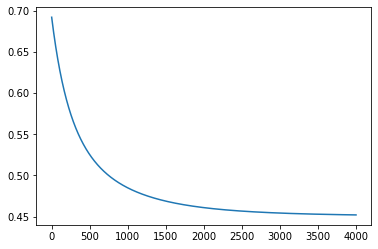

In [ ]:
plt.plot(range(4000),J_his_batch1_L2)
plt.show()

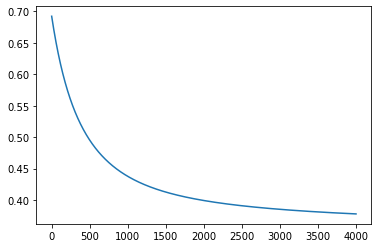

In [ ]:
plt.plot(range(4000),J_his_batch2_L2)
plt.show()

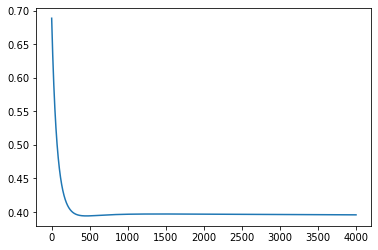

In [ ]:
plt.plot(range(4000),J_his_batch3_L2)
plt.show()

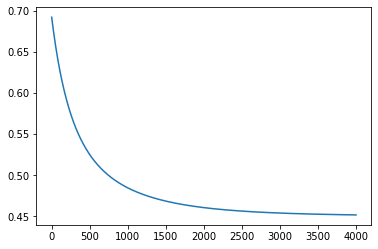

In [ ]:
plt.plot(range(4000),J_his_batch1_L1)
plt.show()

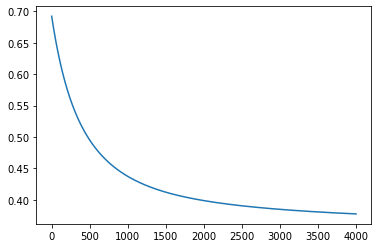

In [ ]:
plt.plot(range(4000),J_his_batch2_L1)
plt.show()

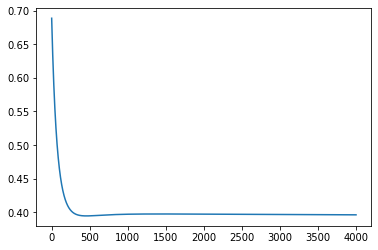

In [ ]:
plt.plot(range(4000),J_his_batch3_L1)
plt.show()

In [ ]:
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_batch_L2_one(pd.DataFrame(train1),pd.Series(label1)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_batch_L2_one(pd.DataFrame(train2),pd.Series(label2)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_batch_L2_one(pd.DataFrame(train3),pd.Series(label3)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_batch_L1_one(pd.DataFrame(train1),pd.Series(label1)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_batch_L1_one(pd.DataFrame(train2),pd.Series(label2)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_batch_L1_one(pd.DataFrame(train3),pd.Series(label3)))

[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.5966276859125237], [0.9999999999999333], [0.4374999999999727], [70.96774193548387])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.4884686833231035], [0.99999999999996], [0.0], [100.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.3877104859358473], [0.999999999999875], [0.0], [80.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.5946788171730927], [0.9999999999999333], [0.4374999999999727], [70.96774193548387])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.48629129637118684], [0.99999999999996], [0.0], [100.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.39110410866355194], [0.999999999999875], [0.0], [80.0])


MINI-BATCH GRADIENT DESCENT

ONE VS ALL CODING

In [ ]:
def one_vs_all_mini_L2(X,y):
  y1 = create_y1(y)
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y1)
  for i in range(2,4):
    for j in range(1,3):
      if i!=j:
        y = y1[:,i-1]
        y_train = y[:int(m*0.7)]
        y_val = y[int(m*0.7):int(m*0.8)]
        y_test = y[int(m*0.8):]
        X_train = X[:int(m*0.7)]
        X_val = X[int(m*0.7):int(m*0.8)]
        X_test = X[int(m*0.8):]
        batch_w, J_his_batch = mini_batch_gradient_descent_L2(Normalise(X_train),y_train ,w,0.001,4000,50,0.001)
        y_pred = np.dot(Normalise(X_test), w)
        y_pred = sigmoid(y_pred)
  
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        Cost = cost_function_L2(Normalise(X_test),y_test,batch_w,0.01) 
        Cost_values.append(Cost)
        a,b,c = specs(Normalise(X_test),y_test,batch_w) 
        sensitivity.append(a)
        specificity.append(b)
        accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_mini_L2_all(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_all_mini_L2(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_mini_L2_all(X,y)
print('All Cost Values :', Cost_values)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.6122108519239832, 0.6931471805599453, 0.6931471805599453]
All accuracies : [84.84848484848484, 93.93939393939394, 93.93939393939394] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.6122108519239832
best accuracy : 93.93939393939394 %


In [ ]:
def one_vs_all_mini_L1(X,y):
  y1 = create_y1(y)
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y1)
  for i in range(2,4):
    for j in range(1,3):
      if i!=j:
        y = y1[:,i-1]
        y_train = y[:int(m*0.7)]
        y_val = y[int(m*0.7):int(m*0.8)]
        y_test = y[int(m*0.8):]
        X_train = X[:int(m*0.7)]
        X_val = X[int(m*0.7):int(m*0.8)]
        X_test = X[int(m*0.8):]
        batch_w, J_his_batch = mini_batch_gradient_descent_L1(Normalise(X_train),y_train ,w,0.001,4000,50,0.001)
        y_pred = np.dot(Normalise(X_test), w)
        y_pred = sigmoid(y_pred)
  
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        Cost = cost_function_L1(Normalise(X_test),y_test,batch_w,0.01) 
        Cost_values.append(Cost)
        a,b,c = specs(Normalise(X_test),y_test,batch_w) 
        sensitivity.append(a)
        specificity.append(b)
        accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_mini_L1_all(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_all_mini_L1(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_mini_L1_all(X,y)
print('All Cost Values :', Cost_values)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.6127484404440589, 0.6931471805599453, 0.6931471805599453]
All accuracies : [84.84848484848484, 93.93939393939394, 93.93939393939394] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.6127484404440589
best accuracy : 93.93939393939394 %


ONE VS ONE CODING

In [ ]:
#Preparing data for 1 vs 1 multiclass classification
train1 = []
train2 = []
train3 = []
label1 = []
label2 = []
label3 = []
train_output = y
train = Normalise(X)
for i in range(train_output.shape[0]):
    if train_output[i] == 1 or train_output[i] == 2:
        train1.append(train[i])
        if train_output[i] == 1:
            label1.append(1)
        else:
            label1.append(0)
for i in range(train_output.shape[0]):
    if train_output[i] == 1 or train_output[i] == 3:
        train2.append(train[i])
        if train_output[i] == 1:
            label2.append(1)
        else:
            label2.append(0)
for i in range(train_output.shape[0]):
    if train_output[i] == 2 or train_output[i] == 3:
        train3.append(train[i])
        if train_output[i] == 2:
            label3.append(1)
        else:
            label3.append(0)

In [ ]:
def one_vs_one_mini_L2(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1])
  m = len(y)
  

  y_train = y[:int(m*0.7)]
  y_val = y[int(m*0.7):int(m*0.8)]
  y_test = y[int(m*0.8):]
  X_train = X[:int(m*0.7)]
  X_val = X[int(m*0.7):int(m*0.8)]
  X_test = X[int(m*0.8):]
  batch_w, J_his_batch = mini_batch_gradient_descent_L2(X_train,y_train ,w,0.001,4000,50,0.001)
  y_pred = np.dot(X_test, w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0
  Cost = cost_function_L2(X_test,y_test,batch_w,0.01) 
  Cost_values.append(Cost)
  a,b,c = specs(X_test,y_test,batch_w) 
  sensitivity.append(a)
  specificity.append(b)
  accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_mini_L2_one(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_one_mini_L2(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
def one_vs_one_mini_L1(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1])
  m = len(y)
  

  y_train = y[:int(m*0.7)]
  y_val = y[int(m*0.7):int(m*0.8)]
  y_test = y[int(m*0.8):]
  X_train = X[:int(m*0.7)]
  X_val = X[int(m*0.7):int(m*0.8)]
  X_test = X[int(m*0.8):]
  batch_w, J_his_batch = mini_batch_gradient_descent_L1(X_train,y_train ,w,0.001,4000,50,0.001)
  y_pred = np.dot(X_test, w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0
  Cost = cost_function_L1(X_test,y_test,batch_w,0.01) 
  Cost_values.append(Cost)
  a,b,c = specs(X_test,y_test,batch_w) 
  sensitivity.append(a)
  specificity.append(b)
  accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_mini_L1_one(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_one_mini_L1(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
mini_batch_w1_L2, mini_J_his_batch1_L2 = mini_batch_gradient_descent_L2(np.array(train1),np.array(label1) ,w,0.001,4000,50,0)
mini_batch_w2_L2, mini_J_his_batch2_L2 = mini_batch_gradient_descent_L2(np.array(train2),np.array(label2) ,w,0.001,4000,50,0)
mini_batch_w3_L2, mini_J_his_batch3_L2 = mini_batch_gradient_descent_L2(np.array(train3),np.array(label3) ,w,0.001,4000,50,0)

mini_batch_w1_L1, mini_J_his_batch1_L1 = mini_batch_gradient_descent_L1(np.array(train1),np.array(label1) ,w,0.001,4000,50,0.001)
mini_batch_w2_L1, mini_J_his_batch2_L1 = mini_batch_gradient_descent_L1(np.array(train2),np.array(label2) ,w,0.001,4000,50,0.001)
mini_batch_w3_L1, mini_J_his_batch3_L1 = mini_batch_gradient_descent_L1(np.array(train3),np.array(label3) ,w,0.001,4000,50,0.001)

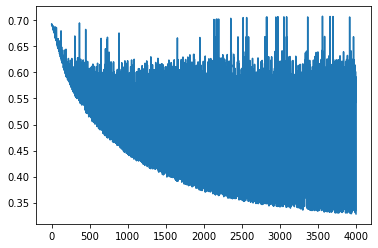

In [ ]:
plt.plot(range(4000),mini_J_his_batch1_L2)
plt.show()

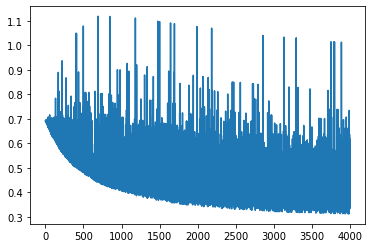

In [ ]:
plt.plot(range(4000),mini_J_his_batch2_L2)
plt.show()

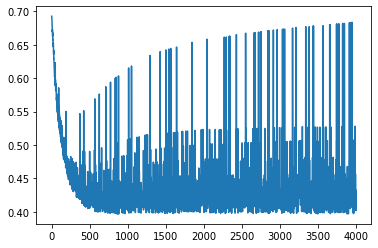

In [ ]:
plt.plot(range(4000),mini_J_his_batch3_L2)
plt.show()

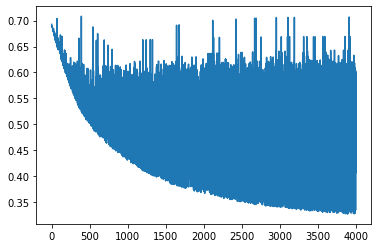

In [ ]:
plt.plot(range(4000),mini_J_his_batch1_L1)
plt.show()

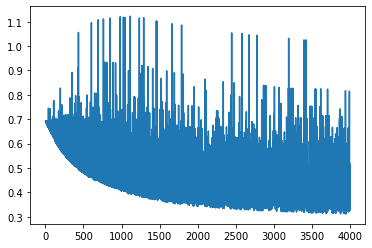

In [ ]:
plt.plot(range(4000),mini_J_his_batch2_L1)
plt.show()

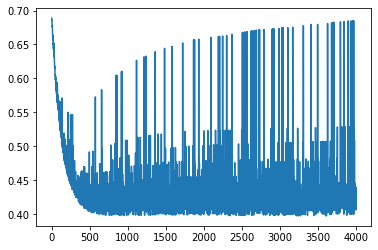

In [ ]:
plt.plot(range(4000),mini_J_his_batch3_L1)
plt.show()

In [ ]:
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_mini_L2_one(pd.DataFrame(train1),pd.Series(label1)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_mini_L2_one(pd.DataFrame(train2),pd.Series(label2)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_mini_L2_one(pd.DataFrame(train3),pd.Series(label3)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_mini_L1_one(pd.DataFrame(train1),pd.Series(label1)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_mini_L1_one(pd.DataFrame(train2),pd.Series(label2)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_mini_L1_one(pd.DataFrame(train3),pd.Series(label3)))

[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.5858982239826755], [0.9999999999999333], [0.4999999999999688], [74.19354838709677])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.4775484571970298], [0.99999999999996], [0.0], [100.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.37997352774180687], [0.999999999999875], [0.9999999999995], [100.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.5841845357442547], [0.9999999999999333], [0.4999999999999688], [74.19354838709677])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.47435437921723494], [0.99999999999996], [0.0], [100.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.3837509338497441], [0.999999999999875], [0.9999999999995], [100.0])


STOCHASTIC GRADIENT DESCENT


ONE VS ALL CODING

In [ ]:
def one_vs_all_stochastic_L2(X,y):
  y1 = create_y1(y)
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y1)
  for i in range(2,4):
    for j in range(1,3):
      if i!=j:
        y = y1[:,i-1]
        y_train = y[:int(m*0.7)]
        y_val = y[int(m*0.7):int(m*0.8)]
        y_test = y[int(m*0.8):]
        X_train = X[:int(m*0.7)]
        X_val = X[int(m*0.7):int(m*0.8)]
        X_test = X[int(m*0.8):]
        batch_w, J_his_batch = stochastic_gradient_descent_L2(Normalise(X_train),y_train ,w,0.001,4000,0.001)
        y_pred = np.dot(Normalise(X_test), w)
        y_pred = sigmoid(y_pred)
  
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        Cost = cost_function_L2(Normalise(X_test),y_test,batch_w,0.01) 
        Cost_values.append(Cost)
        a,b,c = specs(Normalise(X_test),y_test,batch_w) 
        sensitivity.append(a)
        specificity.append(b)
        accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_stochastic_L2_all(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_all_stochastic_L2(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_stochastic_L2_all(X,y)
print('All Cost Values :', Cost_values)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.6211511471570179, 0.6931471805599453, 0.6931471805599453]
All accuracies : [87.87878787878788, 93.93939393939394, 93.93939393939394] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.6211511471570179
best accuracy : 93.93939393939394 %


In [ ]:
def one_vs_all_stochastic_L1(X,y):
  y1 = create_y1(y)
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y1)
  for i in range(2,4):
    for j in range(1,3):
      if i!=j:
        y = y1[:,i-1]
        y_train = y[:int(m*0.7)]
        y_val = y[int(m*0.7):int(m*0.8)]
        y_test = y[int(m*0.8):]
        X_train = X[:int(m*0.7)]
        X_val = X[int(m*0.7):int(m*0.8)]
        X_test = X[int(m*0.8):]
        batch_w, J_his_batch = stochastic_gradient_descent_L1(Normalise(X_train),y_train ,w,0.001,4000,0.001)
        y_pred = np.dot(Normalise(X_test), w)
        y_pred = sigmoid(y_pred)
  
        y_pred[y_pred > 0.5] = 1
        y_pred[y_pred <= 0.5] = 0
        Cost = cost_function_L1(Normalise(X_test),y_test,batch_w,0.01) 
        Cost_values.append(Cost)
        a,b,c = specs(Normalise(X_test),y_test,batch_w) 
        sensitivity.append(a)
        specificity.append(b)
        accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_stochastic_L1_all(X,y):

  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_all_stochastic_L1(X_train ,y_train)

    
  return a,b,c,d

In [ ]:
Cost_values, sensitivity, specificity, accuracy = five_fold_batch_L2_all(X,y)
print('All Cost Values :', Cost_values)
print('All accuracies :', accuracy,'%')

All Cost Values : [0.6179135465370489, 0.6931471805599453, 0.6931471805599453]
All accuracies : [84.84848484848484, 93.93939393939394, 93.93939393939394] %


In [ ]:
print('Least Cost Value :', min(Cost_values))
print('best accuracy :', max(accuracy),'%')

Least Cost Value : 0.6179135465370489
best accuracy : 93.93939393939394 %


ONE VS ONE CODING

In [ ]:
def one_vs_one_stochastic_L2(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1])
  m = len(y)
  

  y_train = y[:int(m*0.7)]
  y_val = y[int(m*0.7):int(m*0.8)]
  y_test = y[int(m*0.8):]
  X_train = X[:int(m*0.7)]
  X_val = X[int(m*0.7):int(m*0.8)]
  X_test = X[int(m*0.8):]
  batch_w, J_his_batch = stochastic_gradient_descent_L2(X_train,y_train ,w,0.0001,6000,0.001)
  y_pred = np.dot(X_test, w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0
  Cost = cost_function_L2(X_test,y_test,batch_w,0.01) 
  Cost_values.append(Cost)
  a,b,c = specs(X_test,y_test,batch_w) 
  sensitivity.append(a)
  specificity.append(b)
  accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_stochastic_L2_one(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_one_stochastic_L2(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
def one_vs_one_stochastic_L1(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1])
  m = len(y)
  

  y_train = y[:int(m*0.7)]
  y_val = y[int(m*0.7):int(m*0.8)]
  y_test = y[int(m*0.8):]
  X_train = X[:int(m*0.7)]
  X_val = X[int(m*0.7):int(m*0.8)]
  X_test = X[int(m*0.8):]
  batch_w, J_his_batch = stochastic_gradient_descent_L1(X_train,y_train ,w,0.0001,6000,0.001)
  y_pred = np.dot(X_test, w)
  y_pred = sigmoid(y_pred)
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred <= 0.5] = 0
  Cost = cost_function_L1(X_test,y_test,batch_w,0.01) 
  Cost_values.append(Cost)
  a,b,c = specs(X_test,y_test,batch_w) 
  sensitivity.append(a)
  specificity.append(b)
  accuracy.append(c)
  return Cost_values, sensitivity, specificity, accuracy

In [ ]:
def five_fold_stochastic_L1_one(X,y):
  sensitivity = []
  specificity = []
  accuracy = []
  Cost_values = []
  w = np.zeros(X.shape[1]+1)
  m = len(y)
  for i in range(5):
    X_test = X[int(i*m*0.2):int((i+1)*m*0.2)]
    X_train = pd.concat([X, X_test, X_test]).drop_duplicates(keep=False)
    y_test = y[int(i*m*0.2):int((i+1)*m*0.2)]
    y_train = y.drop(y_test.index)
    y_train = np.asarray(y_train)
    a,b,c,d = one_vs_one_stochastic_L1(X_train ,y_train)
    
  return a,b,c,d

In [ ]:
stochastic_batch_w1_L2, stochastic_J_his_batch1_L2 = stochastic_gradient_descent_L2(np.array(train1),np.array(label1) ,w,0.0001,6000,0.001)
stochastic_batch_w2_L2, stochastic_J_his_batch2_L2 = stochastic_gradient_descent_L2(np.array(train2),np.array(label2) ,w,0.0001,6000,0.001)
stochastic_batch_w3_L2, stochastic_J_his_batch3_L2 = stochastic_gradient_descent_L2(np.array(train3),np.array(label3) ,w,0.0001,6000,0.001)

stochastic_batch_w1_L1, stochastic_J_his_batch1_L1 = stochastic_gradient_descent_L1(np.array(train1),np.array(label1) ,w,0.0001,6000,0.001)
stochastic_batch_w2_L1, stochastic_J_his_batch2_L1 = stochastic_gradient_descent_L1(np.array(train2),np.array(label2) ,w,0.0001,6000,0.001)
stochastic_batch_w3_L1, stochastic_J_his_batch3_L1 = stochastic_gradient_descent_L1(np.array(train3),np.array(label3) ,w,0.0001,6000,0.001)

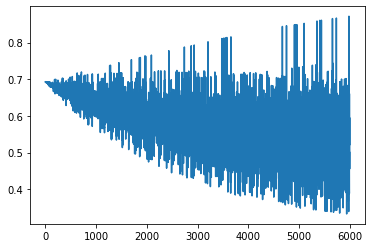

In [ ]:
plt.plot(range(6000),stochastic_J_his_batch1_L2)
plt.show()

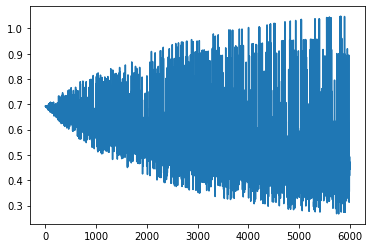

In [ ]:
plt.plot(range(6000),stochastic_J_his_batch2_L2)
plt.show()

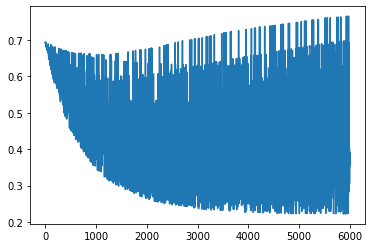

In [ ]:
plt.plot(range(6000),stochastic_J_his_batch3_L2)
plt.show()

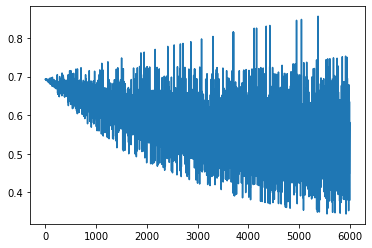

In [ ]:
plt.plot(range(6000),stochastic_J_his_batch1_L1)
plt.show()

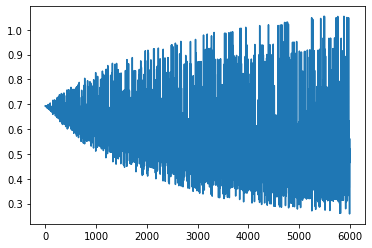

In [ ]:
plt.plot(range(6000),stochastic_J_his_batch2_L1)
plt.show()

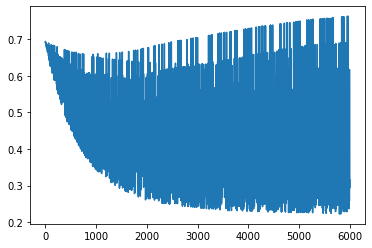

In [ ]:
plt.plot(range(6000),stochastic_J_his_batch3_L1)
plt.show()

In [ ]:
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_stochastic_L2_one(pd.DataFrame(train1),pd.Series(label1)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_stochastic_L2_one(pd.DataFrame(train2),pd.Series(label2)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_stochastic_L2_one(pd.DataFrame(train3),pd.Series(label3)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_stochastic_L1_one(pd.DataFrame(train1),pd.Series(label1)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_stochastic_L1_one(pd.DataFrame(train2),pd.Series(label2)))
print('[Cost_values]', '[sensitivity]', '[specificity]', '[accuracy] :',five_fold_stochastic_L1_one(pd.DataFrame(train3),pd.Series(label3)))

[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.5210622756054091], [0.9333333333332711], [0.9374999999999415], [93.54838709677419])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.5371030881527689], [0.9199999999999633], [0.0], [92.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.36707843978497373], [0.999999999999875], [0.9999999999995], [100.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.518240965703682], [0.9333333333332711], [0.9374999999999415], [93.54838709677419])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.539027687458894], [0.9199999999999633], [0.0], [92.0])
[Cost_values] [sensitivity] [specificity] [accuracy] : ([0.3717047649782945], [0.999999999999875], [0.9999999999995], [100.0])
